In [1]:
import numpy as np
from cv2 import imread
import matplotlib.pyplot as plt

In [2]:
!wget https://www.dropbox.com/s/dbwjqs0mfo5hgw6/mandril.png

--2025-04-21 01:57:41--  https://www.dropbox.com/s/dbwjqs0mfo5hgw6/mandril.png
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/fr6sxiar91o0v21lrb3ie/mandril.png?rlkey=kec7fzhsm8p5glly49z38u7mc [following]
--2025-04-21 01:57:42--  https://www.dropbox.com/scl/fi/fr6sxiar91o0v21lrb3ie/mandril.png?rlkey=kec7fzhsm8p5glly49z38u7mc
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucb3ec5aa07be5a5603c0493804c.dl.dropboxusercontent.com/cd/0/inline/CoMexpH3A7yZpRJkXx_FqMd245vKb5hA_UMkwAGEL2BqC6tEkROmRwbnJmJr1VZYxma4GAwR1F6qn746TourssVJO393uHnvZfy_VWpK_T6v8tUnMRA18-86bsx4EkaU6jY/file# [following]
--2025-04-21 01:57:42--  https://ucb3ec5aa07be5a5603c0493804c.dl.dropboxusercontent.com/cd/0/inline/CoMexpH3A7yZpRJkXx_FqMd24

In [3]:
img_example='mandril.png'

In [4]:
img=imread(img_example)

In [5]:
X=img[:,:,0]

In [6]:
def data_img(img):
  print('size= ', img.shape)
  print('max = ', np.max(img))
  print('min = ', np.min(img))

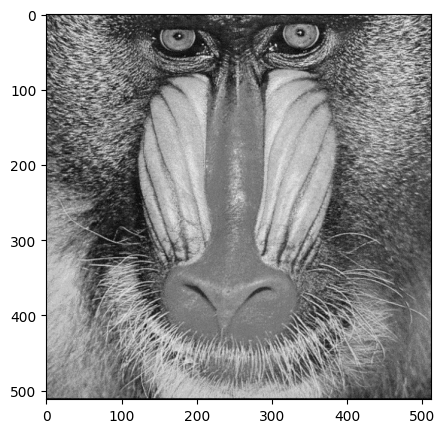

In [7]:
plt.figure(figsize=(5,5))
plt.imshow(img, cmap='gray')
plt.show()

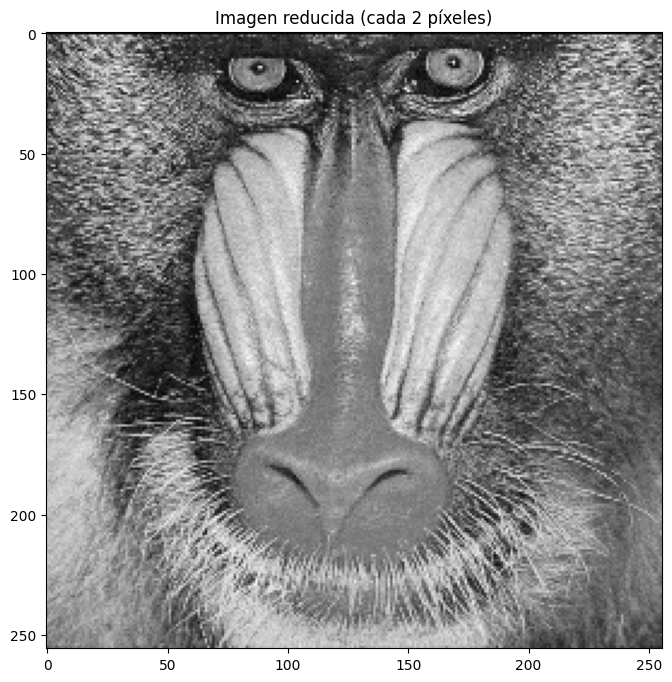

Shape de imagen reducida: (256, 256)


In [11]:
#probamos downsampling: reduccion de resolucion
d = 2
(Nx,Mx) = X.shape
ix = range(0,Nx,d)
jx = range(0,Mx,d)
Ny = len(ix)
My = len(jx)
Y = np.zeros((Ny,My),np.uint8)
for i in range(Ny):
  for j in range(My):
    Y[i,j] = X[ix[i],jx[j]]
plt.figure(figsize=(8,8))
plt.imshow(Y,cmap='gray')
plt.title(f"Imagen reducida (cada {d} píxeles)")
plt.show()
print("Shape de imagen reducida:", Y.shape)

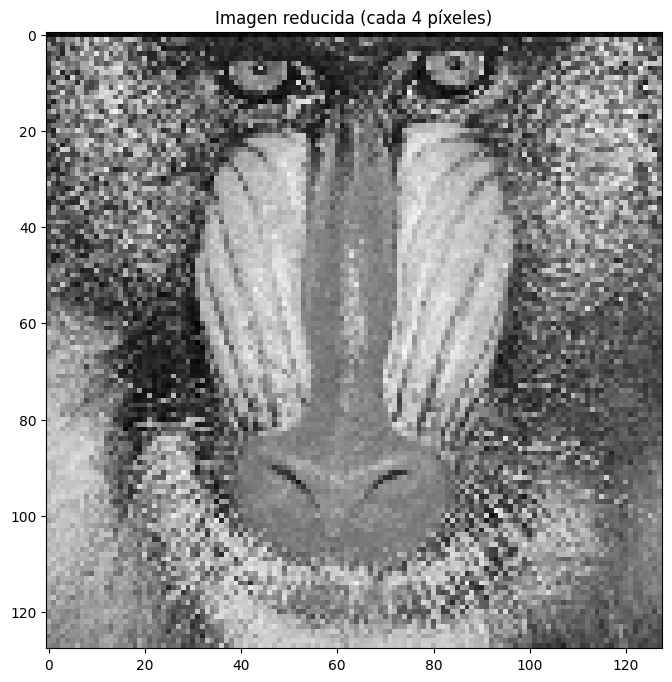

Shape de imagen reducida: (128, 128)


In [12]:
#probamos downsampling: reduccion de resolucion
d = 4
(Nx,Mx) = X.shape
ix = range(0,Nx,d)
jx = range(0,Mx,d)
Ny = len(ix)
My = len(jx)
Y = np.zeros((Ny,My),np.uint8)
for i in range(Ny):
  for j in range(My):
    Y[i,j] = X[ix[i],jx[j]]
plt.figure(figsize=(8,8))
plt.imshow(Y,cmap='gray')
plt.title(f"Imagen reducida (cada {d} píxeles)")
plt.show()
print("Shape de imagen reducida:", Y.shape)

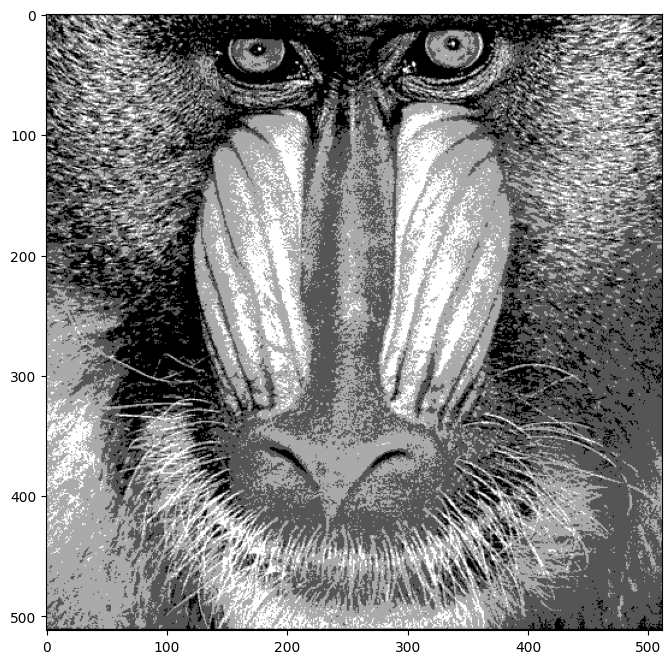

Esta imagen tiene =  4 niveles de gris


In [13]:
#Probamos posterizacion, reduccion de niveles de gris
p=64
(Nx,Mx) = X.shape
Ny = Nx
My = Mx
Y = np.zeros((Ny,My),np.uint8)
for i in range(Ny):
  for j in range(My):
    x = int(np.fix(X[i,j]/p)*p)
    Y[i,j] = x
plt.figure(figsize=(8,8))
plt.imshow(Y,cmap='gray')
plt.show()
print('Esta imagen tiene = ',int(256/p),'niveles de gris')

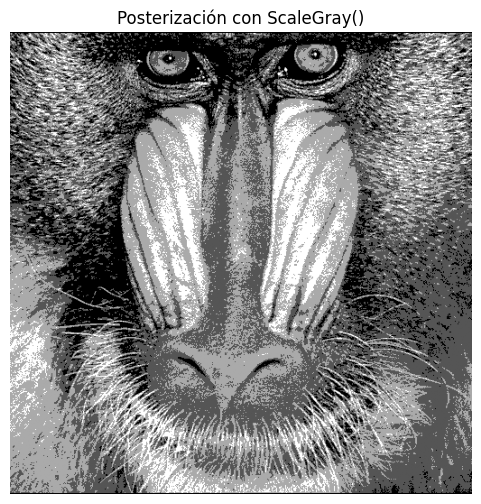

In [15]:
#propuesta de Ignacio para hacer lo mismo
def ScaleGray(img: np.ndarray, d: int) -> np.ndarray:
    return np.floor_divide(img, d) * d

Y_vec = ScaleGray(X, p)

plt.figure(figsize=(6,6))
plt.imshow(Y_vec, cmap='gray')
plt.title("Posterización con ScaleGray()")
plt.axis('off')
plt.show()

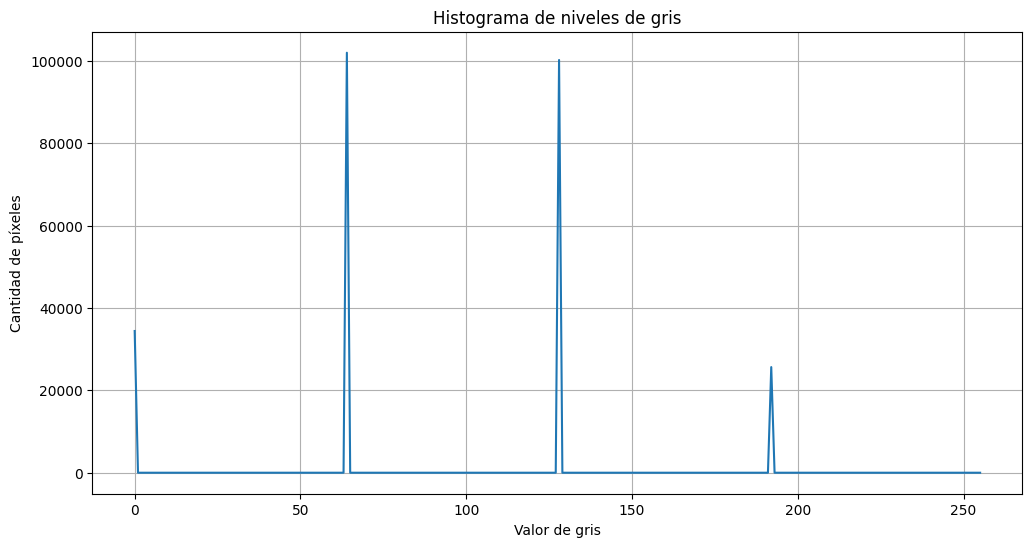

In [17]:
def imhist(X,n=256):
  (N,M) = X.shape
  h = np.zeros((n,))
  for i in range(N):
    for j in range(M):
      x = X[i,j]
      h[x] = h[x]+1
  return h
n = 256
h = imhist(Y, n=n)
plt.figure(figsize=(12,6))
plt.plot(range(n), h[:n])
plt.title("Histograma de niveles de gris")
plt.xlabel("Valor de gris")
plt.ylabel("Cantidad de píxeles")
plt.grid()
plt.show()